# Now that 0x0, 1x1, 0x2 are all in .py file as functions
can start testing the effects of varying the parameters. The parameters of interest to vary are
- $\alpha$, the amp map power, which has default value -3.0
- $\beta_0$, the SED power, which has default value -3.2
- $\gamma$, the power for the $C_\ell^{\beta\beta}$. Must be constrained to $\gamma<-2$ for convergence
- $\nu_0$, the freqency we do our Taylor expansion about. Current default is 2.3 GHz
- $A_s, A_\beta, \ell_*$ these are less interesting as they are degenerate with one another. We can probably leave $\ell_*=80$ and just vary the synch and beta amplitudes. 

In [55]:
%load_ext autoreload
# to make modification in .py file type %autoreload

%load_ext line_profiler
#for finding out how long code takes to run
#an example of how to get diagnostics on functions
#%lprun -f ff.generate_map_full ff.generate_map_full(384, A_BB, alpha_BB, beta_sigma, freqs, nu0)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
The line_profiler extension is already loaded. To reload it, use:
  %reload_ext line_profiler


In [56]:
#trying to consolidate the work so far into a cohesive document and notation. Pushing definitions into 
#separate .py file

#------packages-------------------
%pylab inline
import time
import healpy as hp
import matplotlib.pyplot as plt
import foreground_functions as ff
import scipy.special as sp #for the zeta function sp.zeta() in the 0x2 term


#-------BB parameters (to start)--------
# A_BB = 1.7e3
# alpha_BB = -3.0
# beta_BB = -3.2
# beta_sigma = 1.5e-6

# A_beta = 1e-6
# gamma_BB = -2.1 #needs to be less than -2 for the 0x2 term to converge
# nu0 = 2.3e9

# #-------map paramters--------------------
# nside = 128
# Lmax = 3*nside
# ells = np.arange(0,Lmax)

#define list of frequencies going from 10 to 300 GHz, sampling 20 points
freqs = np.linspace(30,300,4)*1.e9

Populating the interactive namespace from numpy and matplotlib


/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gamma']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [80]:
%autoreload

In [58]:
#to do here
'''
write script to take in relevant arguments and then outputs all
the plots of the powerspectra overlayed with the 0x0--0x2 moments
at the relevant freqencies

plot residuals and see what's up

add in a parameter to the plots to do multiple realisations and plot the avg power spectrum we're trying to fit
could also put boolean optional parameter to overlay the multiple realisations
''';

In [59]:
#moments with default values to test the residual plots
ells = np.arange(0,384)
moment0x0 = ff.auto0x0(freqs)
moment1x1 = ff.auto1x1(freqs)
moment0x2 = ff.auto0x2(freqs)
model = moment0x0+moment1x1+moment0x2

In [60]:
test_map = ff.map_full_power(freqs)

In [122]:
resid = np.zeros((len(freqs), len(ells)))
for i in range(len(freqs)):
    resid[i] = hp.anafast(test_map[i])-model[i]

In [138]:
#make a function to calculate chi-square
def get_chi_square(resid):
    chi_square = 0
    for i in range(len(resid)):
        chi_square += resid[i]**2
    return chi_square

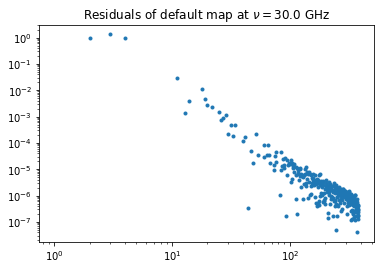

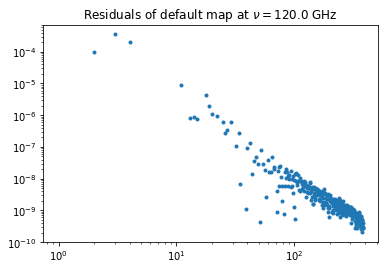

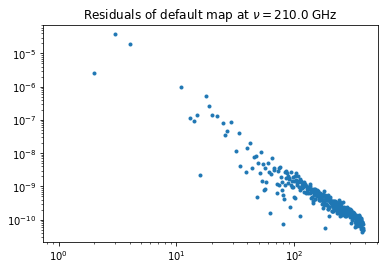

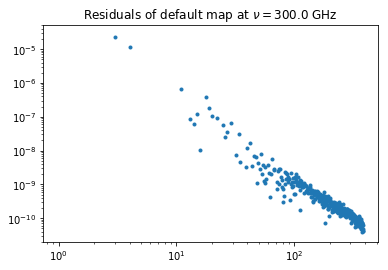

In [139]:
for i in range(len(freqs)):
    figure()
    loglog(ells, resid[i], '.')
    title(r'Residuals of default map at $\nu=$' + str(np.round(1e-9*freqs[i],2)) + ' GHz')

In [151]:
chi_square = np.zeros(len(freqs))
for i in range(len(freqs)):
    chi_square[i] = get_chi_square(resid[i])

In [161]:
chi_square

array([3.71605949e+00, 2.43557610e-07, 3.15155483e-09, 1.45184685e-09])

Text(0.5, 1.0, 'loglog of chi^2 vs frequency with fixed other parameters')

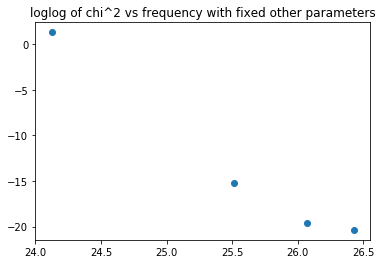

In [171]:
scatter(np.log(freqs),np.log(chi_square))
title('loglog of chi^2 vs frequency with fixed other parameters')

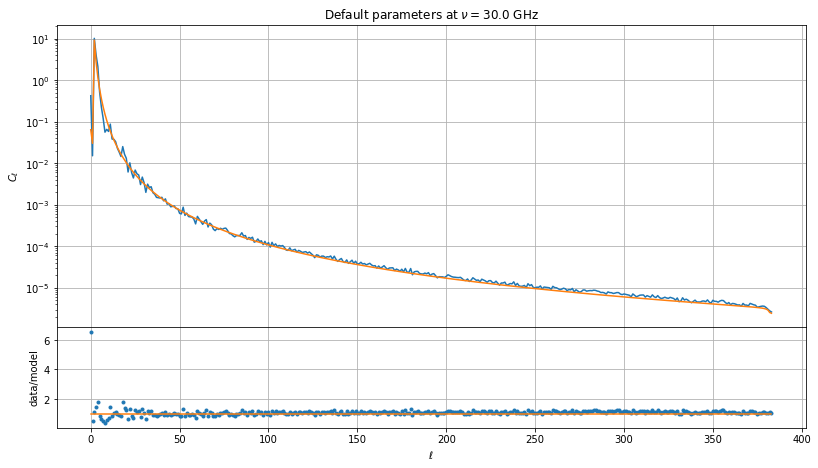

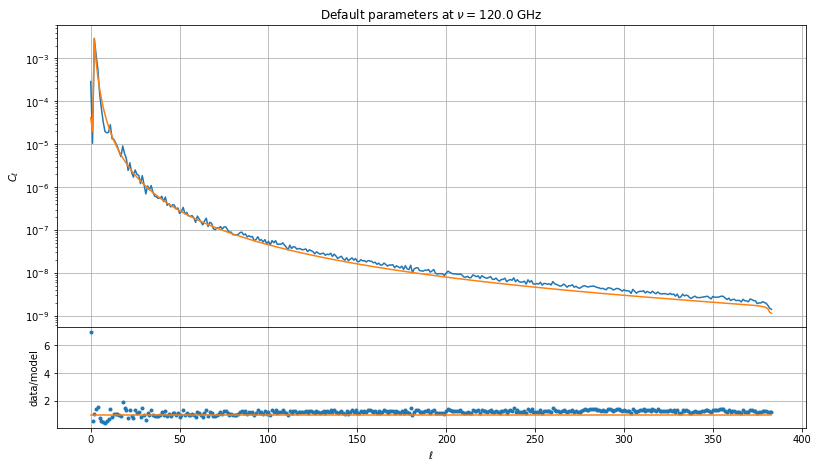

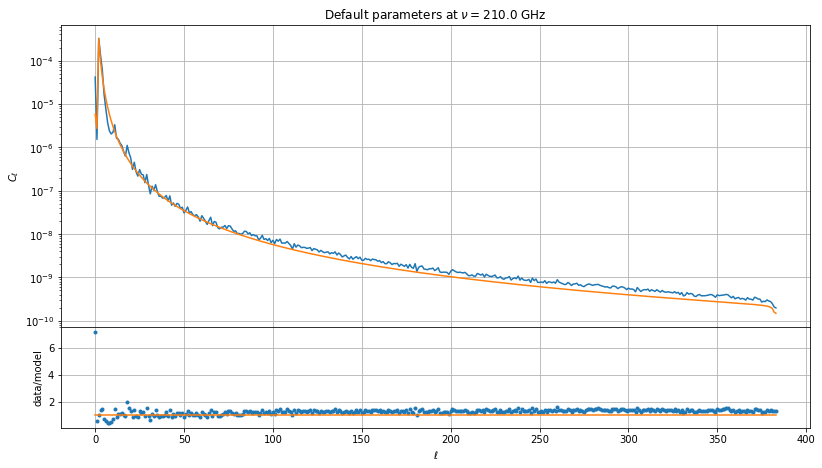

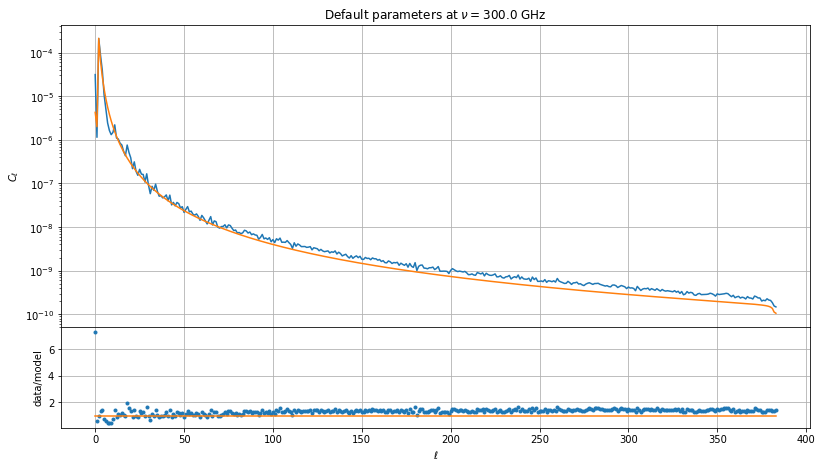

In [166]:
for i in range(len(freqs)):
    anafast = hp.anafast(test_map[i])
    
    fig1 = figure(i, figsize=(13,7))
    
    #Plot Data-model
    frame1=fig1.add_axes((.1,.3,.8,.6))
    #xstart, ystart, xend, yend [units are fraction of the image frame, from bottom left corner]
    semilogy(ells, anafast)
    semilogy(ells, model[i])
    frame1.set_xticklabels([]) #Remove x-tic labels for the first frame
    ylabel(r'$C_\ell$')
    title(r'Default parameters at $\nu=$' + str(np.round(1e-9*freqs[i],2)) + ' GHz')
    grid()
    #Residual plot
    ratio = anafast/model[i]
    
#     difference = np.abs(anafast-model[i])
    frame2=fig1.add_axes((.1,.1,.8,.2)) 
    plot(ells, ratio, '.')
    plot(ells, ones_like(ells))
    ylabel('data/model')
    xlabel(r'$\ell$')
#     semilogy(ells,difference,'.')
    grid()

In [110]:
resid.shape

(384,)

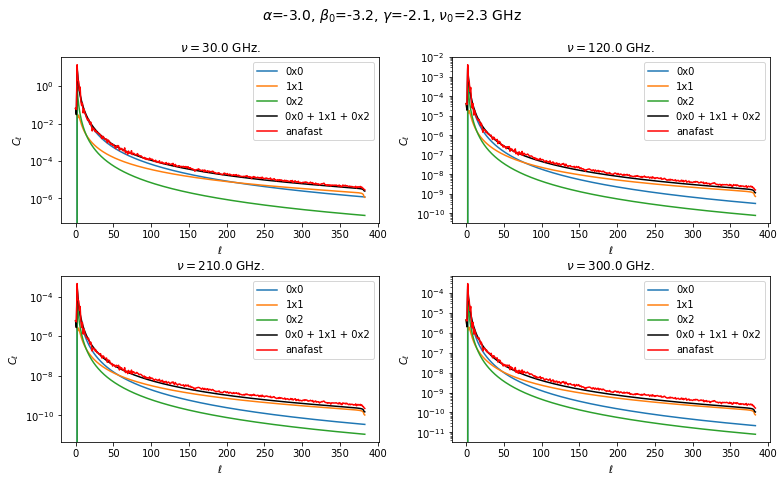

In [64]:
ff.get_plots(freqs)

In [108]:
%autoreload

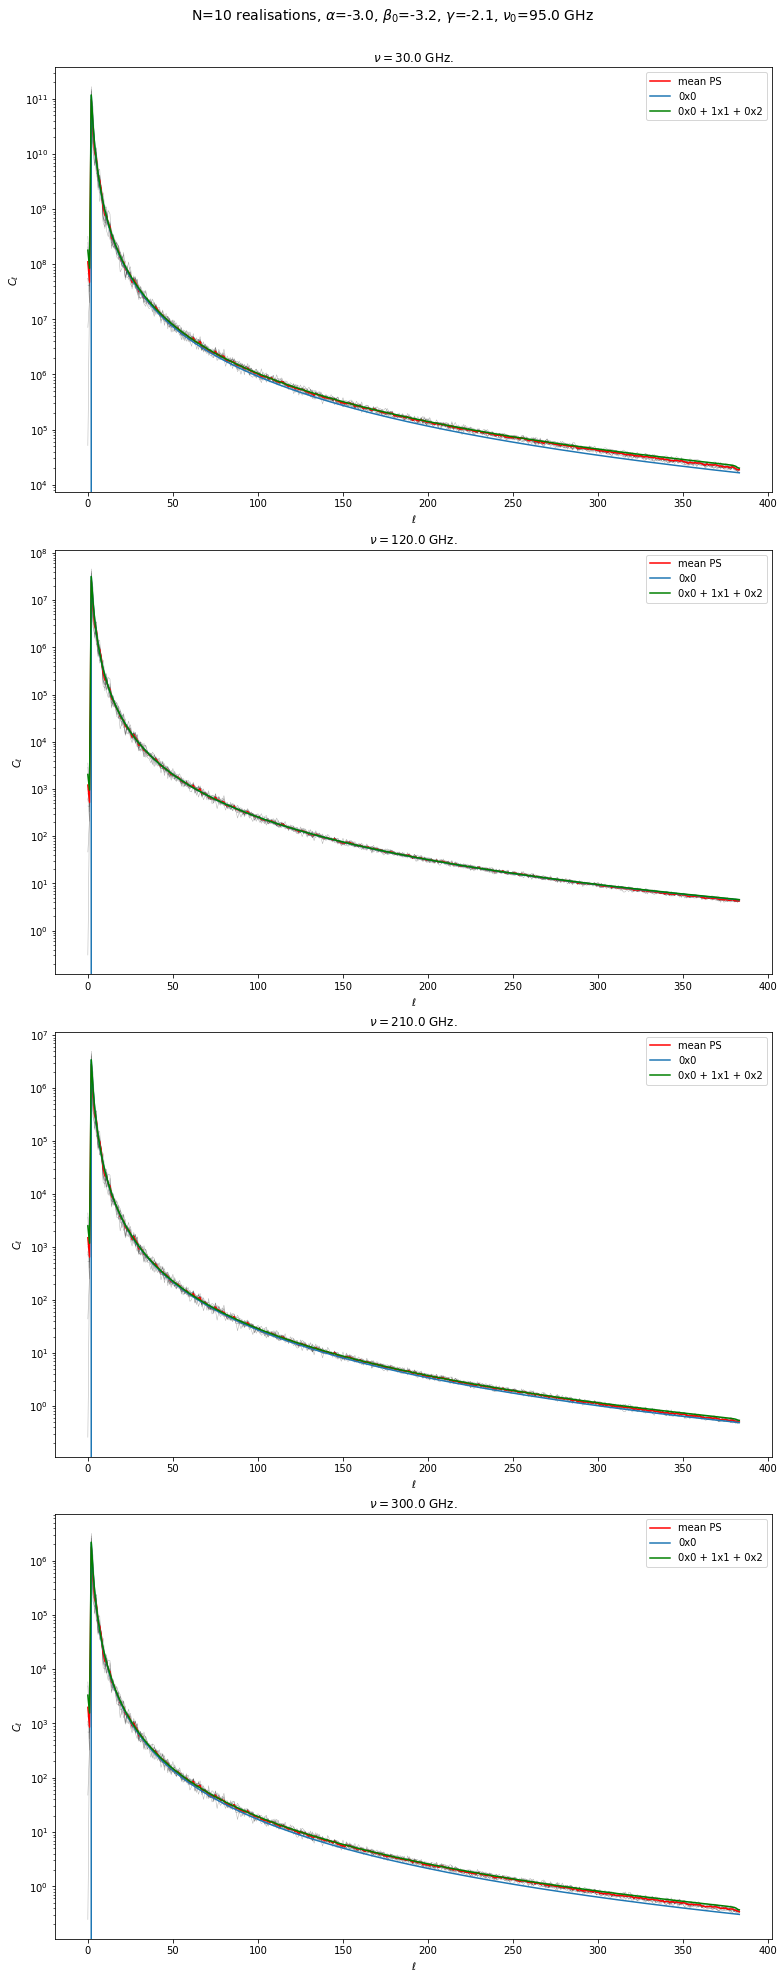

16.5506911277771


In [109]:
start=time.time()
ff.get_plots(freqs, realisation=True, N=10)
print(time.time()-start)

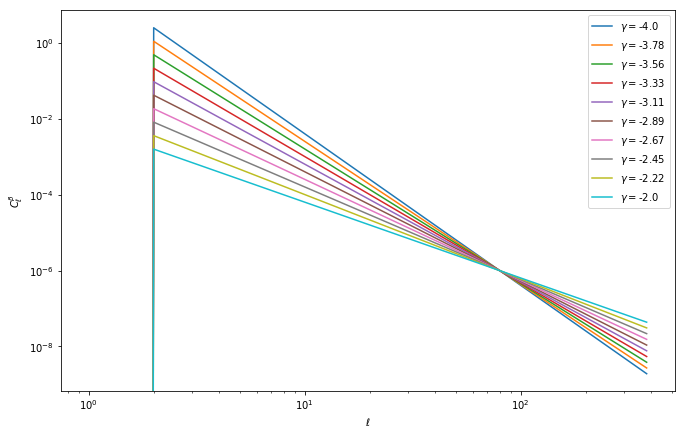

In [74]:
#check the amplitude normalisation for gamma
figure(figsize=(11,7))
for gamma in gammas:
    bcls, beta_map = ff.map_power_beta(gamma=gamma)
    loglog(bcls, label=r'$\gamma=$'+str(np.round(gamma,2)))
    xlabel(r'$\ell$')
    ylabel(r'$C_\ell^\beta$')
    legend();

In [75]:
#define some different ranges of each parameter

#set of alpha values
alphas = np.linspace(-6., -1., 6)
#set of beta_0 values
beta_0s = np.linspace(-6., -1., 10)
#set of gamma values
gammas = np.linspace(-4., -2.001, 10)
#set nu0 values
nu0s = np.linspace(2.3e9, 100e9, 3)

# Vary $\nu_0$

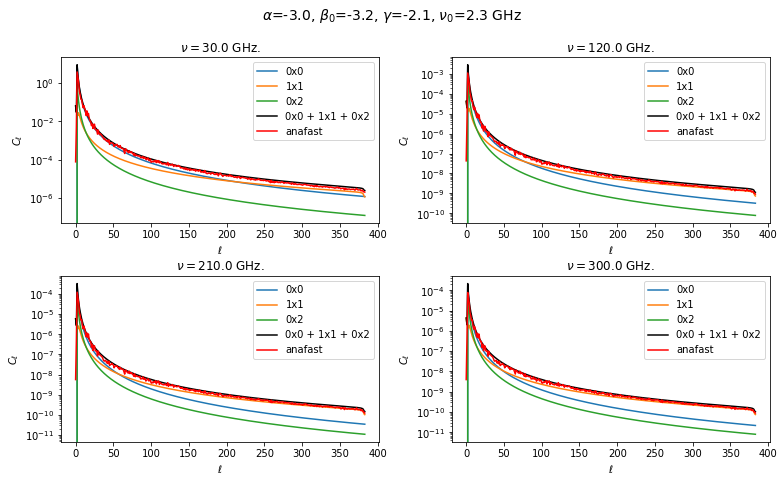

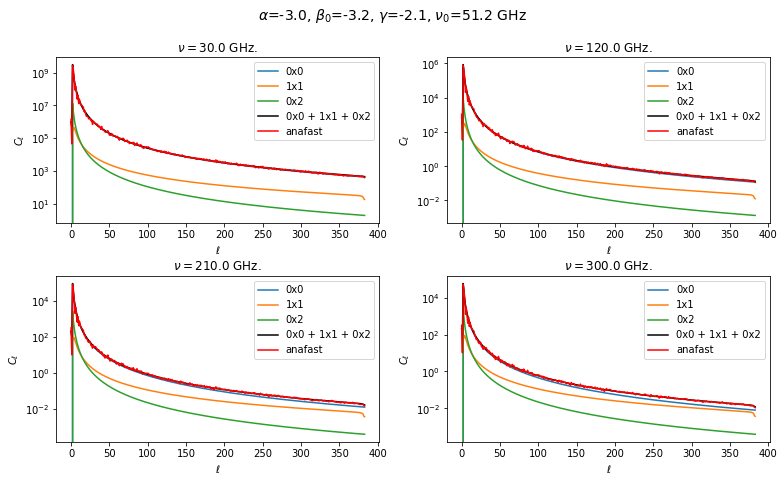

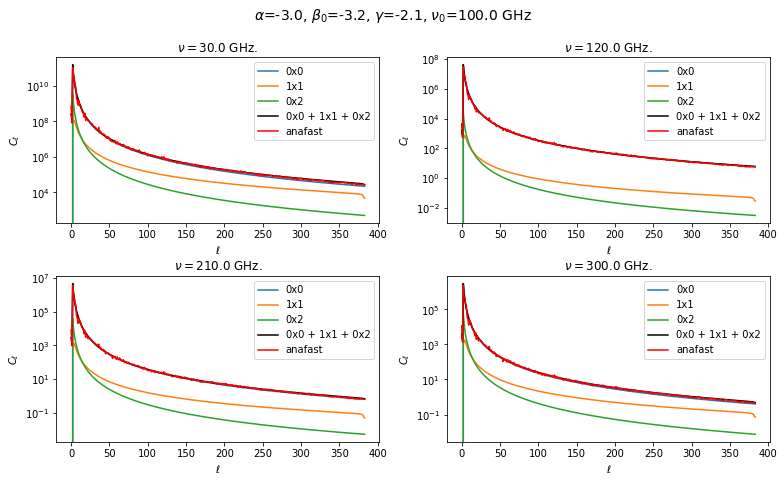

In [76]:
for nu in nu0s:
    ff.get_plots(freqs, nu0=nu)

# Vary $\alpha$

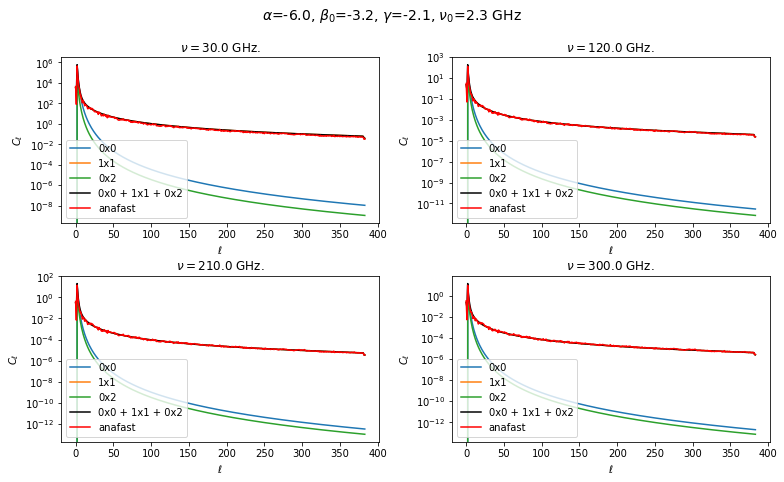

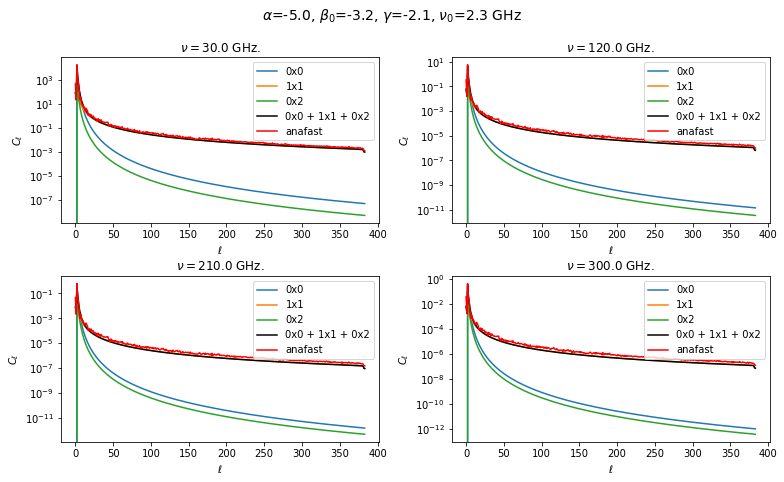

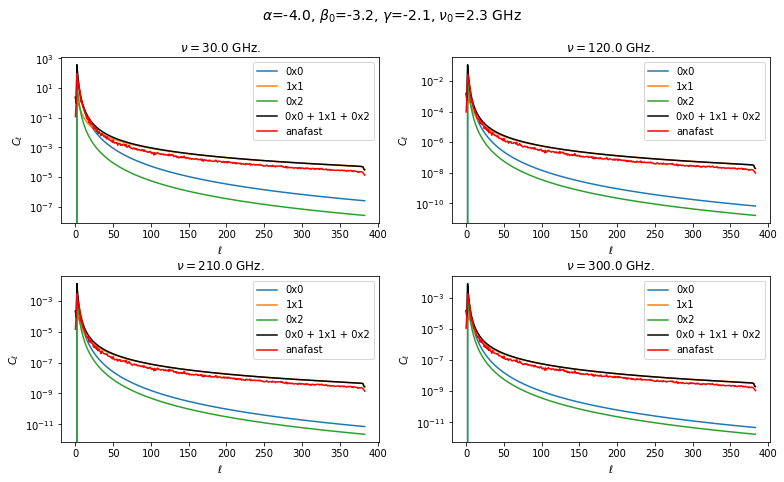

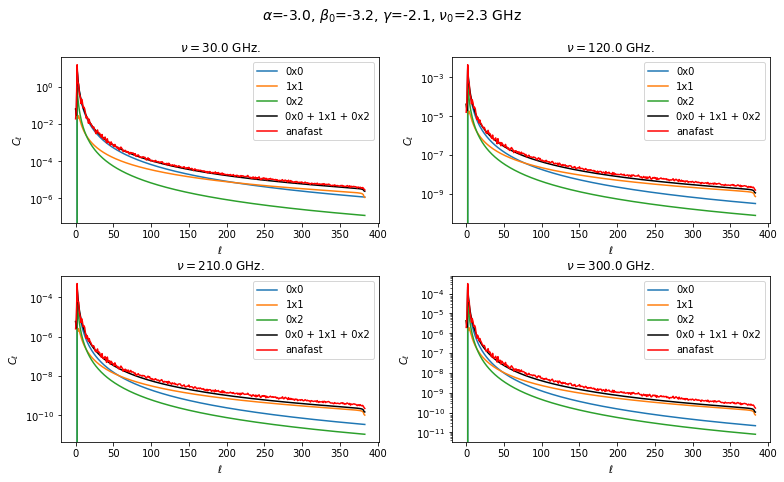

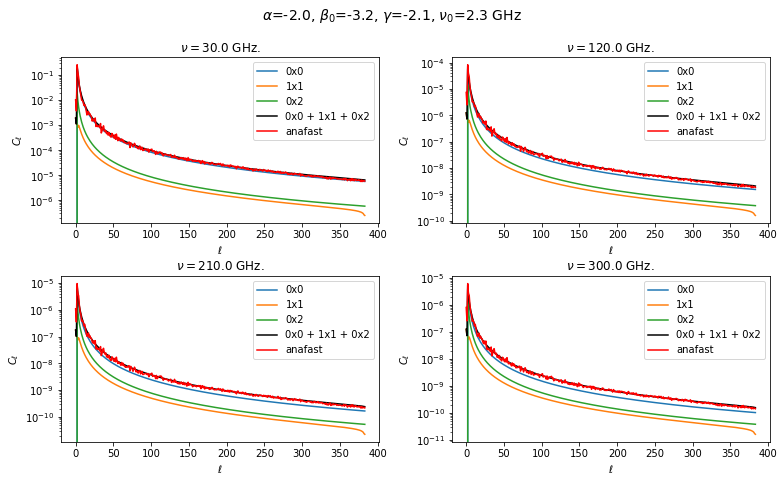

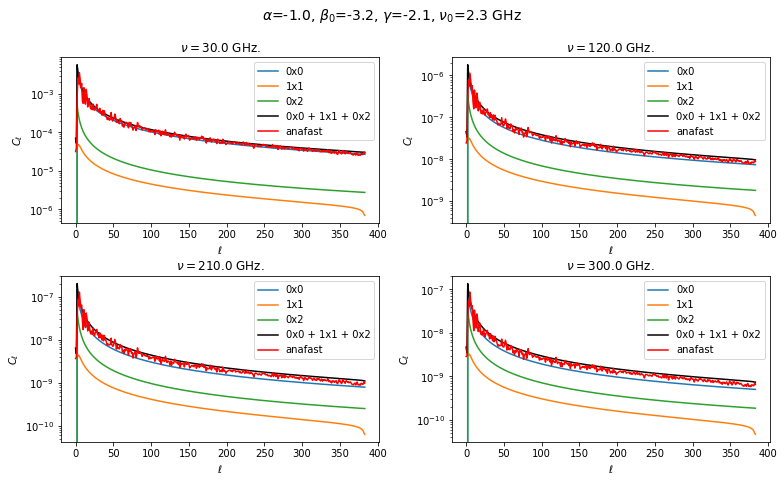

In [77]:
for alpha in alphas:
    ff.get_plots(freqs, alpha=alpha)

# Vary $\beta$

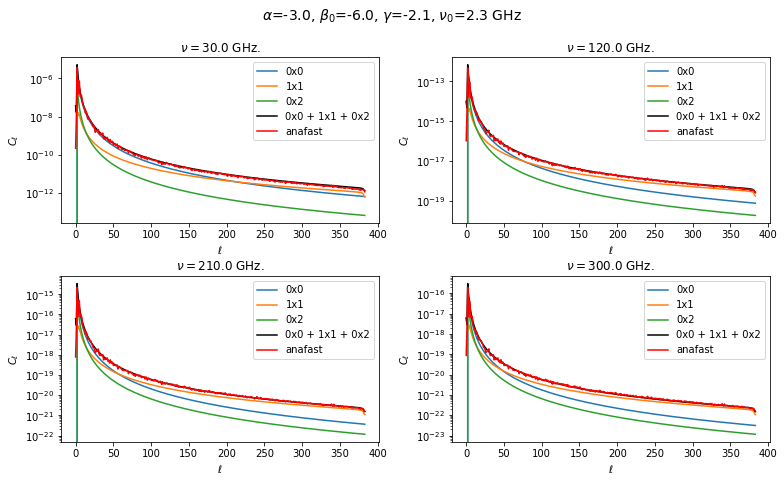

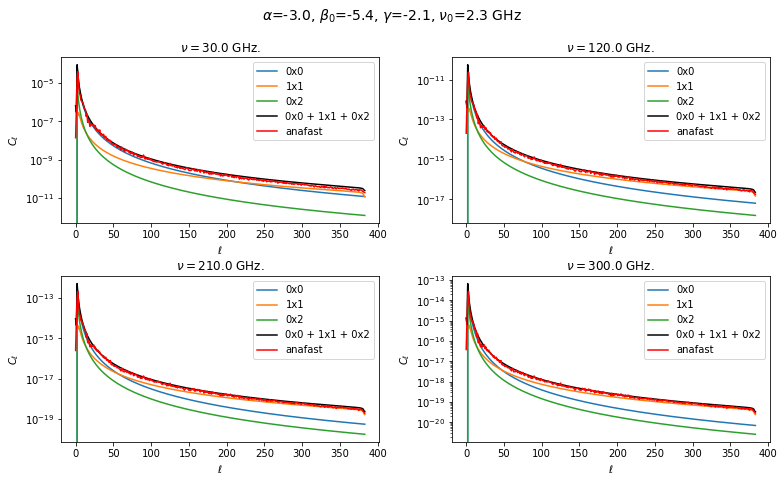

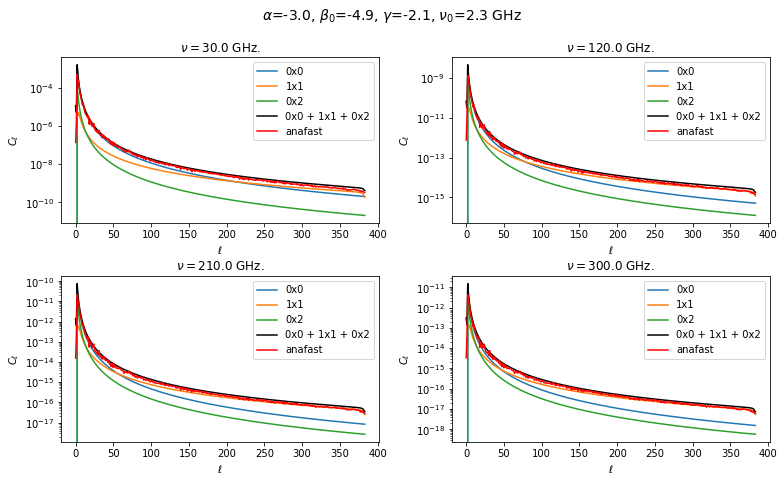

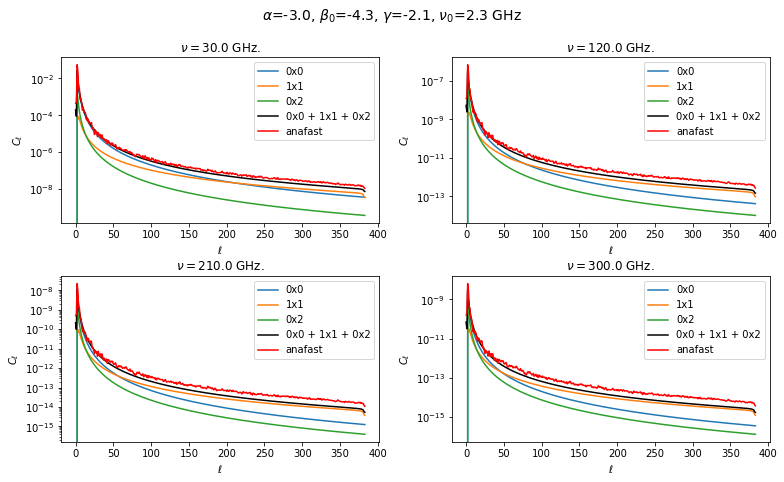

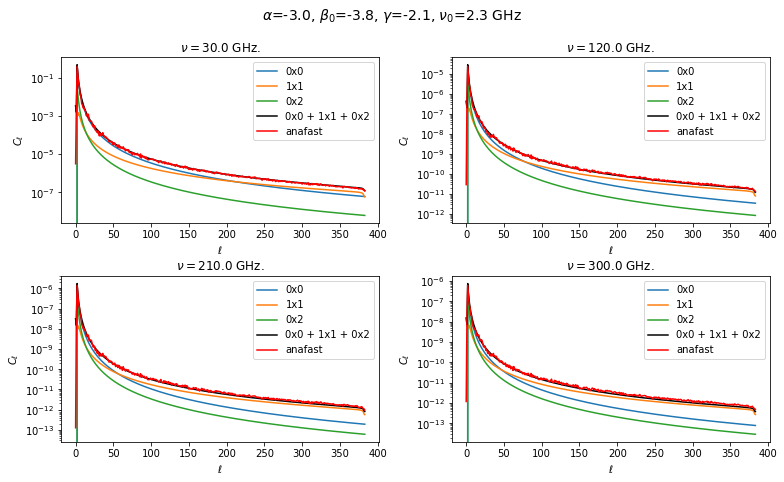

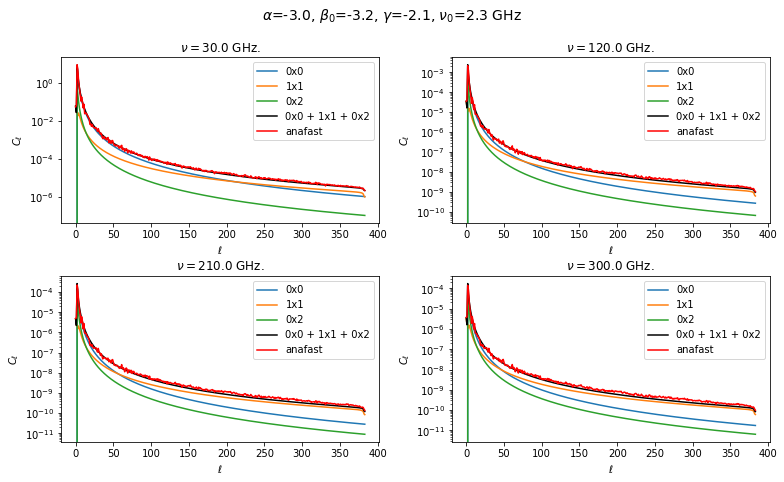

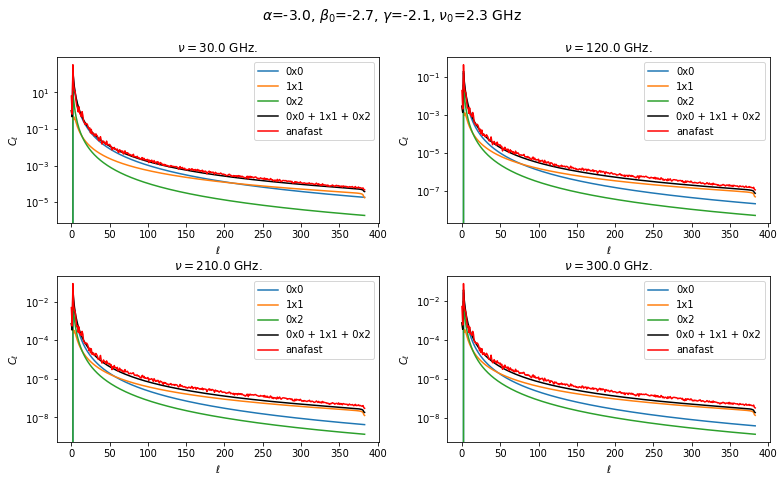

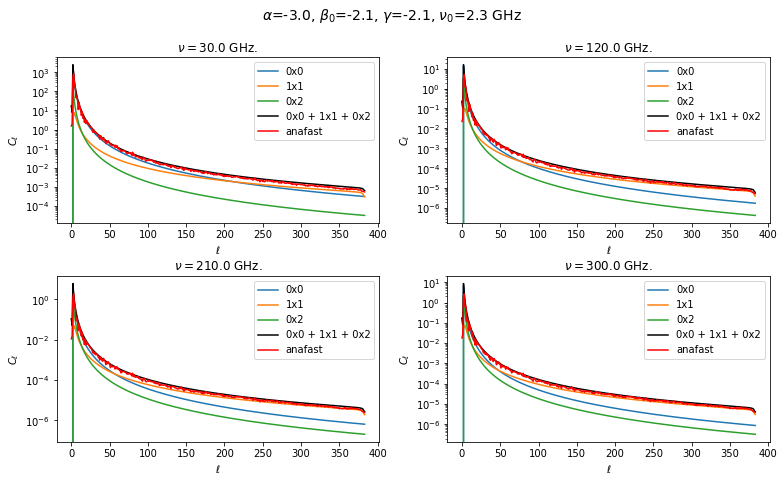

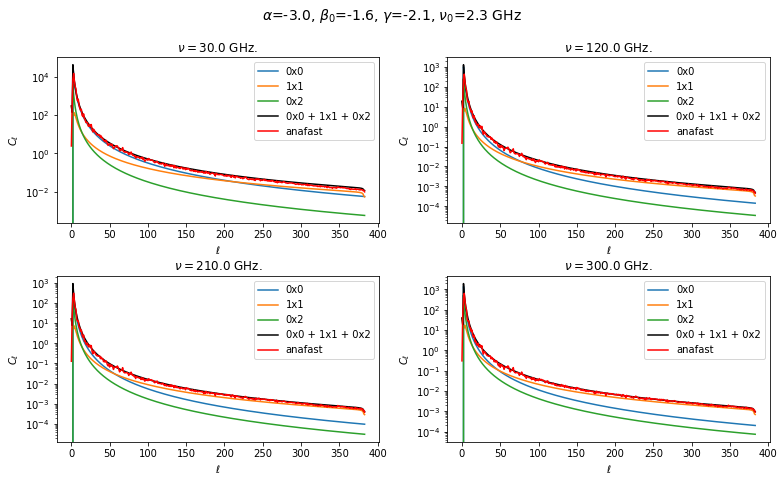

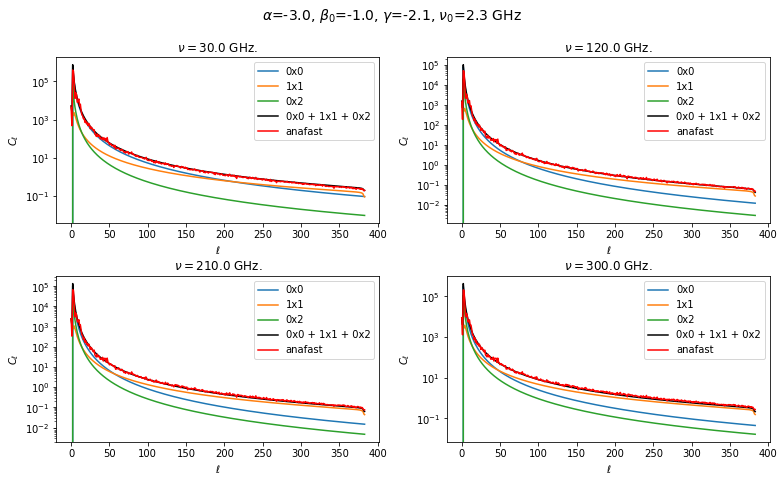

In [78]:
for beta in beta_0s:
    ff.get_plots(freqs, beta_0=beta)

# Vary $\gamma$

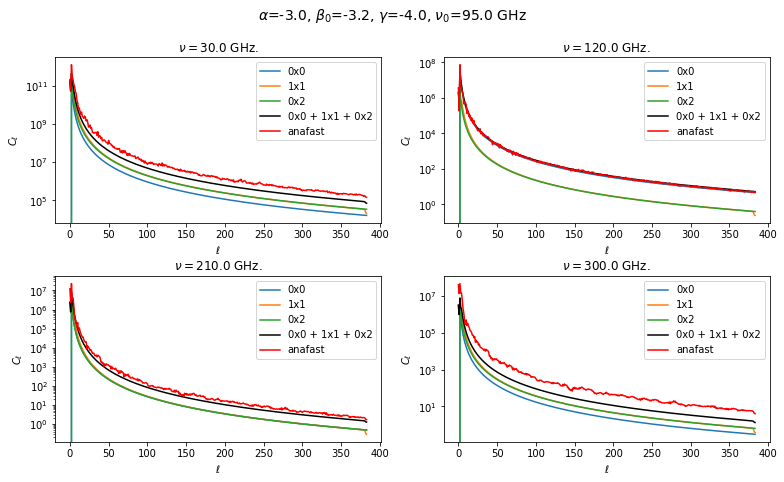

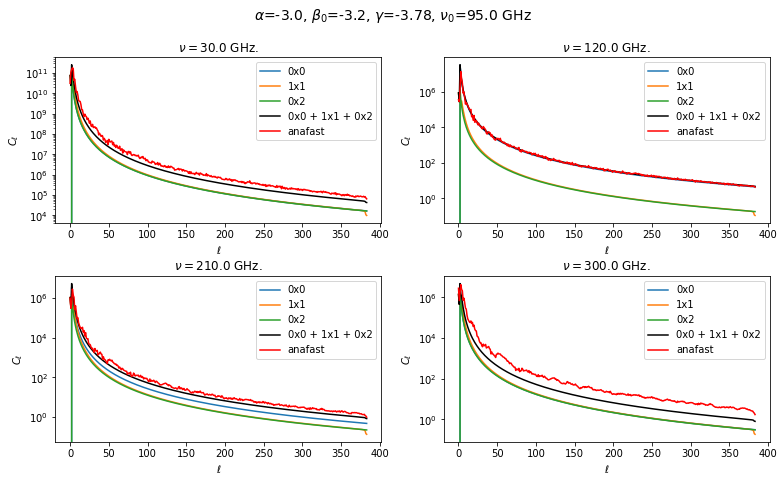

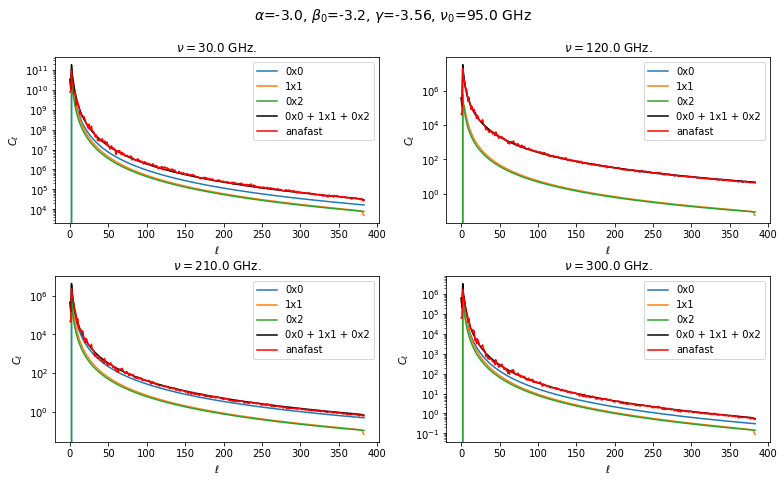

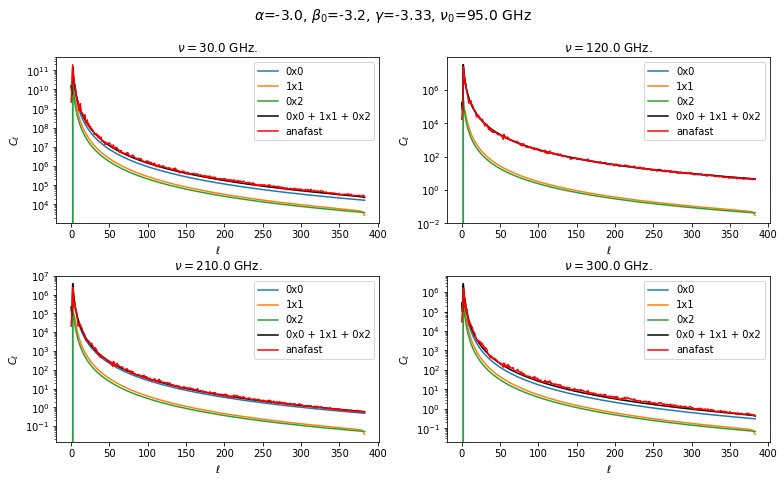

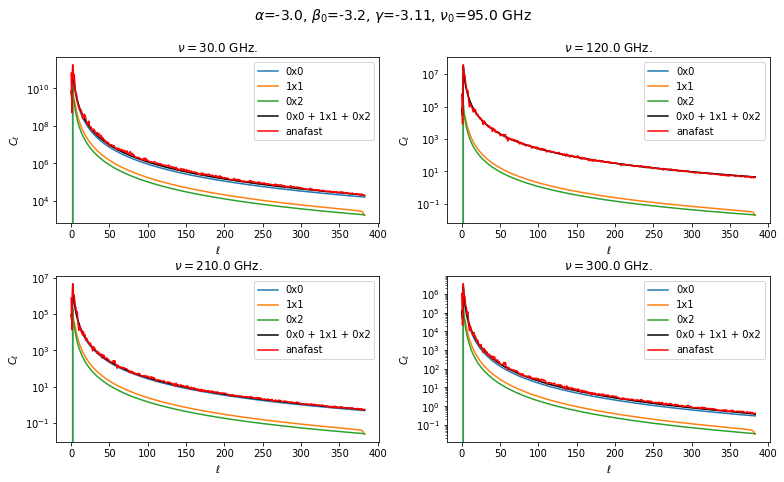

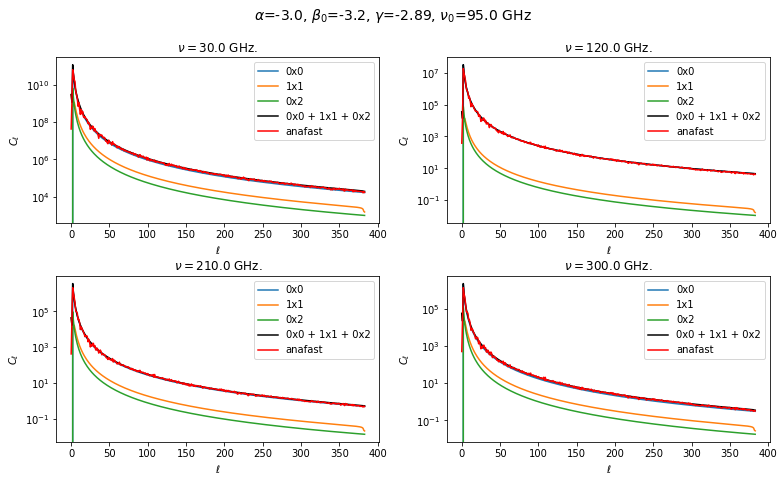

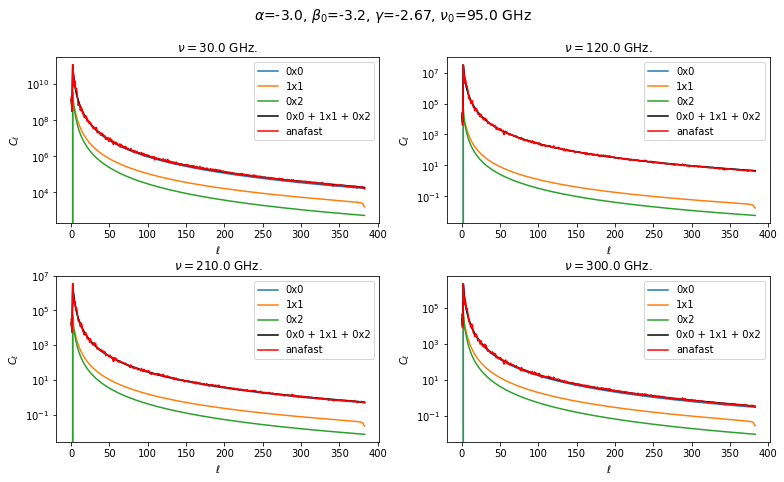

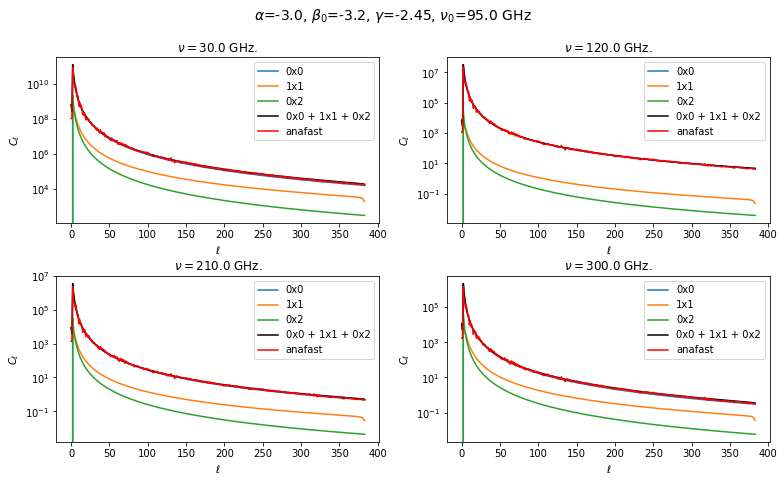

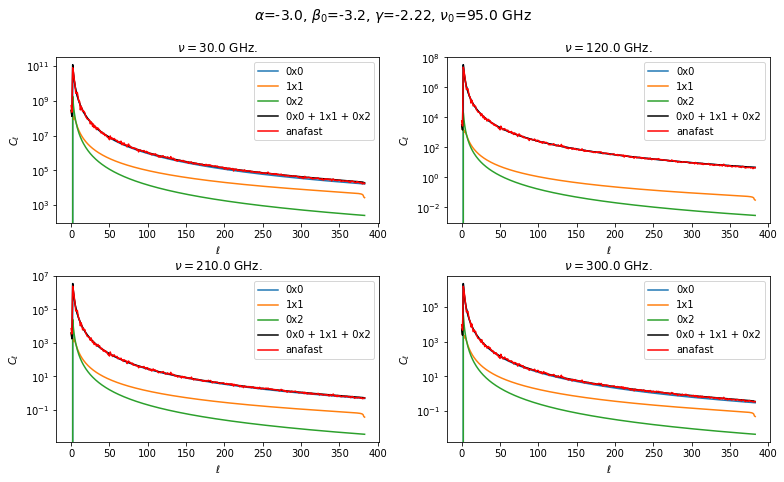

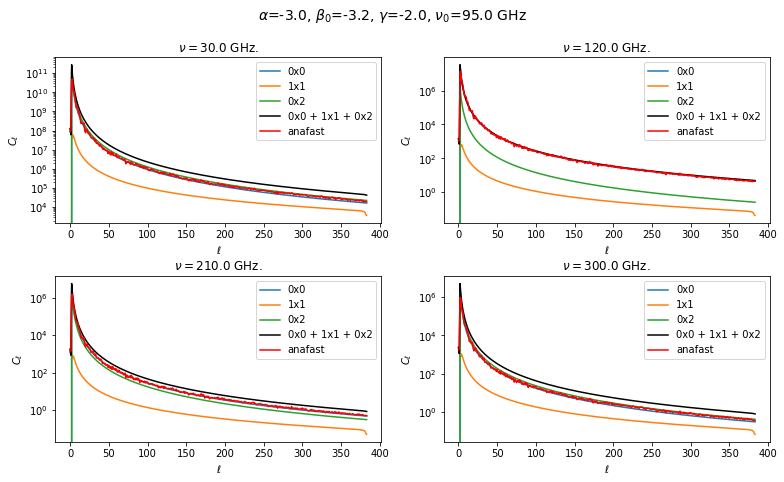

In [81]:
for gamma in gammas:
    ff.get_plots(freqs, gamma=gamma)

In [ ]:
#hmmmmm...

In [31]:
%autoreload

In [36]:
N=100
start=time.time()
realisation = ff.realisation_power(N, freqs)
print(time.time()-start)

82.76938390731812


In [33]:
# %lprun -f ff.realisation_power ff.realisation_power(N, freqs)

In [37]:
# %lprun -f ff.map_amp ff.map_amp()

In [38]:
mean_ps = np.mean(realisation, 0)

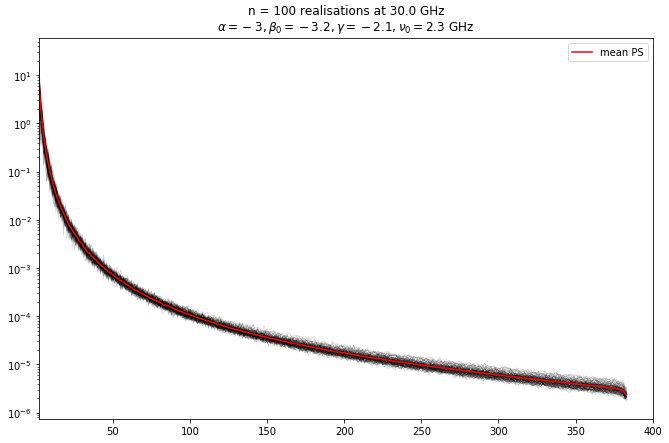

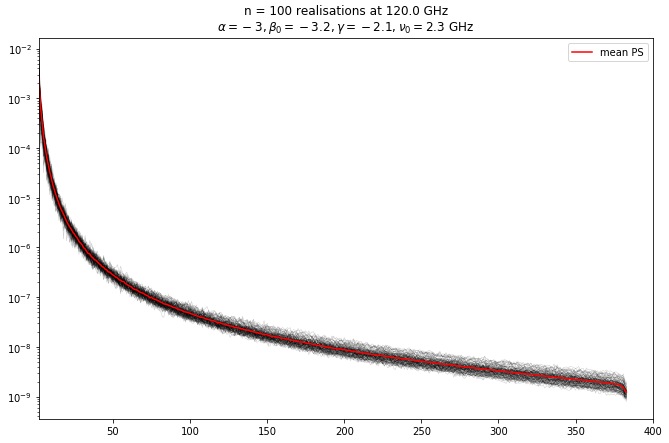

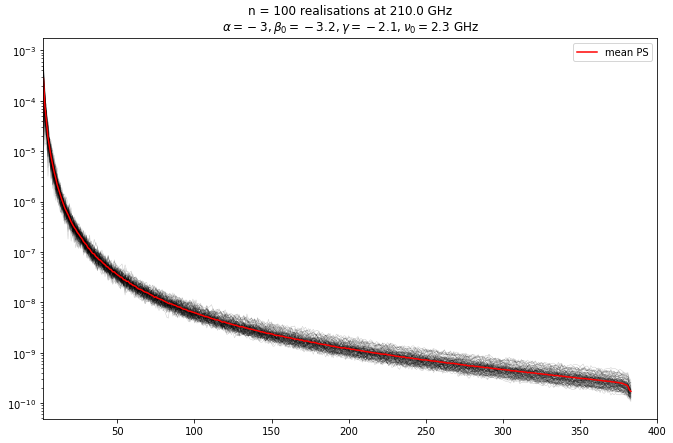

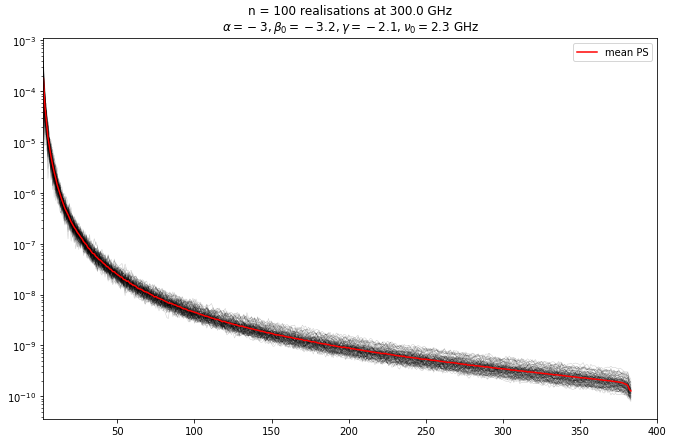

In [43]:
for i in range(len(freqs)):
    figure(figsize=(11,7))
    
    for j in range(N):
        semilogy(realisation[j,:,i], 'k', alpha = 0.2, lw=.5)
        
    semilogy(mean_ps[:,i], 'r', label='mean PS')
    xlim(2,400)
    title('n = ' + str(N) + ' realisations at ' + str(np.round(1e-9*freqs[i])) + ' GHz' +"\n" + r'$\alpha = -3, \beta_0 = -3.2, \gamma=-2.1, \nu_0=2.3 \ \rm GHz$')
    legend();